In [165]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [299]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [343]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [344]:
data_dir.glob

<bound method Path.glob of PosixPath('/Users/kong/.keras/datasets/flower_photos')>

In [282]:
# 데이터set 가져오기
data = list(data_dir.glob('*/*'))

In [284]:
pix=[]
# 사용 이미지의 픽셀값 추출 roses 이미지에 대한 수행 
import numpy as np
from PIL import Image
for i in range(len(roses)):
    img_name = (roses[i])
    im = Image.open(img_name)
    pix.append(np.array(im))

In [285]:
class_names = ['roses', 'dandelion', 'tulips', 'sunflowers', 'daisy']

In [286]:
# list 형을 numpy로 변환 -> 정규화 작업할 수 있게끔

data = np.array(pix)

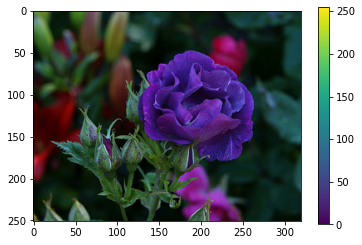

In [287]:
plt.figure()
plt.imshow(data[306])
plt.colorbar()
plt.grid(False)
plt.show()

In [369]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [393]:
train = (len(data))*0.8
test = (len(data))*0.2

print('train set:',train,'\n','test set:', test)

train set: 2936.0 
 test set: 734.0


In [400]:
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [410]:
train_labels=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

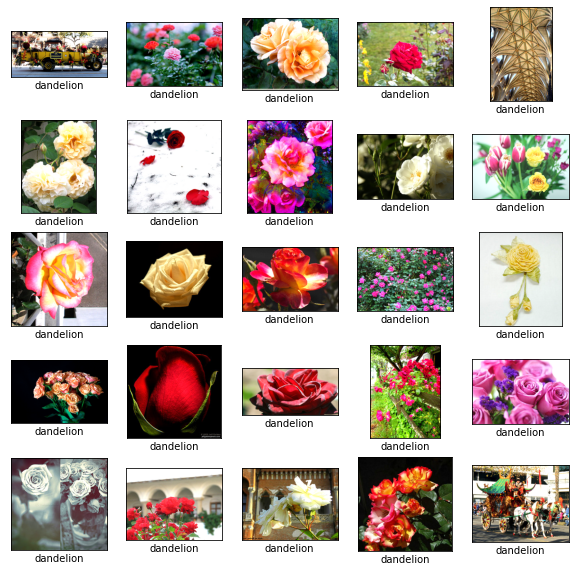

In [411]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [443]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [444]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [446]:
type(train_labels)

numpy.ndarray

In [429]:
train_labels=np.array(train_labels)

In [442]:
train_images

array([array([[[0.        , 0.01470588, 0.06862745],
        [0.00980392, 0.        , 0.00490196],
        [0.02941176, 0.        , 0.        ],
        ...,
        [1.19117647, 1.20098039, 1.19607843],
        [1.19117647, 1.20098039, 1.19607843],
        [1.19117647, 1.20098039, 1.19607843]],

       [[0.04411765, 0.        , 0.        ],
        [0.01960784, 0.        , 0.        ],
        [0.0245098 , 0.03431373, 0.01960784],
        ...,
        [1.18627451, 1.19607843, 1.19117647],
        [1.18627451, 1.19607843, 1.19117647],
        [1.18627451, 1.19607843, 1.19117647]],

       [[0.80392157, 0.27941176, 0.01470588],
        [0.64705882, 0.30882353, 0.14705882],
        [0.09313725, 0.        , 0.        ],
        ...,
        [1.19117647, 1.20098039, 1.19607843],
        [1.19117647, 1.20098039, 1.19607843],
        [1.19117647, 1.20098039, 1.19607843]],

       ...,

       [[0.41666667, 0.51470588, 0.68627451],
        [0.43627451, 0.54901961, 0.71568627],
        [0.4411

In [447]:
model.fit(train_images[:40], train_labels, epochs=5)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [435]:
predictions[0]

array([6.6715043e-06, 6.6037906e-08, 1.4861364e-07, 2.8917353e-07,
       2.7349483e-07, 8.0169942e-03, 5.1912257e-06, 1.1557812e-01,
       7.4754935e-06, 8.7638468e-01], dtype=float32)

In [436]:
np.argmax(predictions[0])

9

In [437]:
test_labels[0]

9

In [438]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                            100*np.max(predictions_array),
                            class_names[true_label]),
                            color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

IndexError: list index out of range

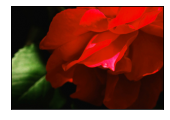

In [439]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

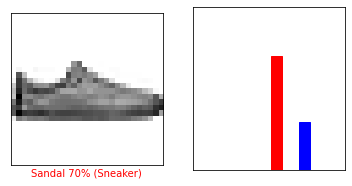

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

IndexError: list index out of range

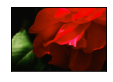

In [440]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [22]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [23]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.67149834e-06 6.60379129e-08 1.48613651e-07 2.89174096e-07
  2.73494862e-07 8.01698864e-03 5.19122159e-06 1.15578085e-01
  7.47549439e-06 8.76384795e-01]]


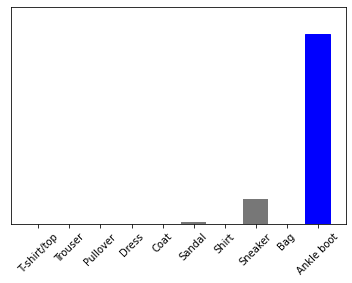

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

9

In [ ]:
₩